In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [2]:
# showing all columns
pd.set_option('display.max_columns', None)

In [23]:
sns.set_style('white')
plt.rc("axes.spines", top=False, right=False) #  turn off the visibility of the top and right spines for all the graphs

In [3]:
# loading the dataset to a pandas DataFrame object
car_df = pd.read_csv('Task_data.csv')

## Exploratory Data Analysis

In [4]:
car_df.head(5)

,registrationNumber,fuelType,monthOfFirstRegistration
0,ORZ1598,Diesel,2020-03-01 00:00:00 UTC
1,ORZ6755,Diesel,2020-03-01 00:00:00 UTC
2,RGZ3683,Diesel,2020-03-01 00:00:00 UTC
3,UIG7890,Diesel,2020-03-01 00:00:00 UTC
4,UIG8424,Diesel,2020-03-01 00:00:00 UTC


In [5]:
# renaming the column names in order to have a more namining
car_df.rename({'registrationNumber':'VRN',
              'monthOfFirstRegistration':'first_reg_date'}, 
              axis=1,
             inplace=True)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48605 entries, 0 to 48604
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   VRN             48605 non-null  object
 1   fuelType        48605 non-null  object
 2   first_reg_date  48605 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


We notice that the **first_reg_date** is not a datetime object, we should fix it later

In [7]:
car_df.fuelType.unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Pure electric', 'Gas'], dtype=object)

This sample data set, consists of **48,605** rows and **3** columns. Its information is about about vehicles registered in Northern Ireland from March 2020 to March 2021.<br>more analytically:

1. **VRN**: Refers to the Vehicle Registration Number of the vehicle. From it we can derive information about where the vehicle was registered.
2. **fuelType**: Refers to the vehicle's fuel type (Petrol, Diesel, Hybrid, Pure electric, Gas).
3. **first_reg_date**: Refers to the date the vehicle was first registered .

#### Missing values

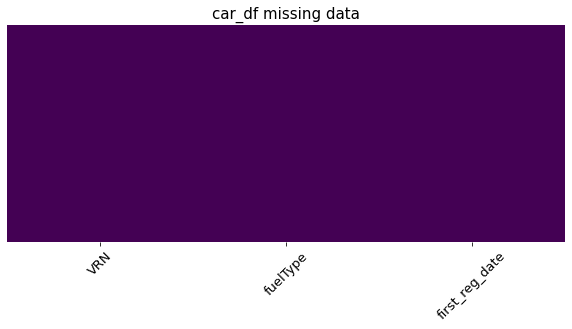

In [11]:
# the below heatmap depicts any missing value with yellow color
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(car_df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax1)
ax1.tick_params(axis='x', labelsize=13, rotation = 45)
ax1.set_title('car_df missing data', fontsize=15);

In [12]:
car_df.isnull().sum()

VRN               0
fuelType          0
first_reg_date    0
dtype: int64

**There are no missing values in the dataset**

#### Duplicated values

In [13]:
car_df.duplicated(keep=False).sum() 
# the dataframe.duplicated() method returns a boolean series denoting the duplicate rows
# the keep argument determines which duplicates to mark, keep=False marks all duplicate rows as TRUE, whule keep='first' mark duplicates as True except for the first occurrence
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

0

**All rows are unique**

### Registration Number feature

In [8]:
car_df.VRN.duplicated(keep=False).sum() 

0

All the cars are unique

In [15]:
# according to wiki page the 2nd and 3rd letter indicate the area within Northern Ireland where the vehicle was registered. 
# we are going to extract those letters

In [9]:
car_df['country_code'] = car_df.VRN.apply(lambda x: x[1:3])

In [10]:
car_df['country_code'].value_counts().index.sort_values()

Index(['AZ', 'BZ', 'CZ', 'DZ', 'EZ', 'FZ', 'GZ', 'HZ', 'IA', 'IB', 'IG', 'IJ',
       'IL', 'IW', 'JI', 'JZ', 'KZ', 'LZ', 'NZ', 'OI', 'RZ', 'SZ', 'UI', 'XI',
       'XZ', 'YZ'],
      dtype='object')

In [11]:
country_code_dict = {'AZ':'Belfast', 
                     'BZ':'Down', 
                     'CZ':'Belfast', 
                     'DZ':'Antrim', 
                     'EZ':'Belfast', 
                     'FZ':'Belfast', 
                     'GZ':'Belfast', 
                     'HZ':'Tyrone', 
                     'IA':'Antrim', 
                     'IB':'Armagh',
                     'IG':'Fermanagh', 
                     'IJ':'Down', 
                     'IL':'Fermanagh', 
                     'IW':'County Londonderry', 
                     'JI':'Tyrone', 
                     'JZ':'Down', 
                     'KZ':'Antrim', 
                     'LZ':'Armagh', 
                     'NZ':'County Londonderry', 
                     'OI':'Belfast',
                     'RZ':'Antrim', 
                     'SZ':'Down', 
                     'UI':'City of Londonderry', 
                     'XI':'Belfast', 
                     'XZ':'Armagh', 
                     'YZ':'County Londonderry'}

In [12]:
car_df['country_code'] = car_df['country_code'].replace(country_code_dict)

In [13]:
# switcing this column to a category type from object type for better memory optimization (its a smalll data set but is a good practice)
car_df['country_code'] = car_df['country_code'].astype('category')

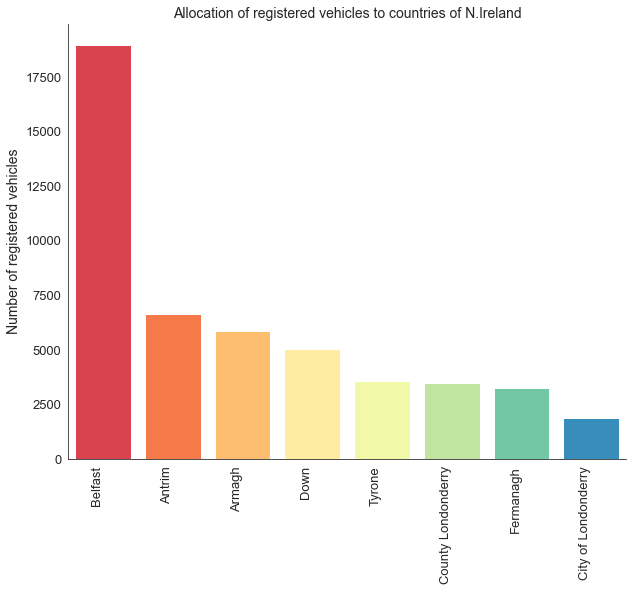

In [39]:
fig = plt.figure(figsize=(10,8))
sns.countplot(x='country_code', data=car_df, order=car_df.country_code.value_counts().index, palette='Spectral', saturation=1)
plt.title('Allocation of registered vehicles to countries of N.Ireland', fontsize=14)
plt.xlabel(None)
plt.xticks(rotation=90, ha='right', fontsize=13)
plt.ylabel('Number of registered vehicles', fontsize=14)
plt.yticks(fontsize=13);

In [17]:
# now we will try to replace the country codes to the full country name

### Fuel type feature

In [26]:
car_df.fuelType.value_counts()

Petrol           23683
Diesel           16833
Hybrid            6098
Pure electric     1937
Gas                 54
Name: fuelType, dtype: int64

In [23]:
# switching the fuel column type to a category type for better memory optimization
car_df.fuelType = car_df.fuelType.astype('category')

<ipython-input-42-085eb25ed3f2>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])


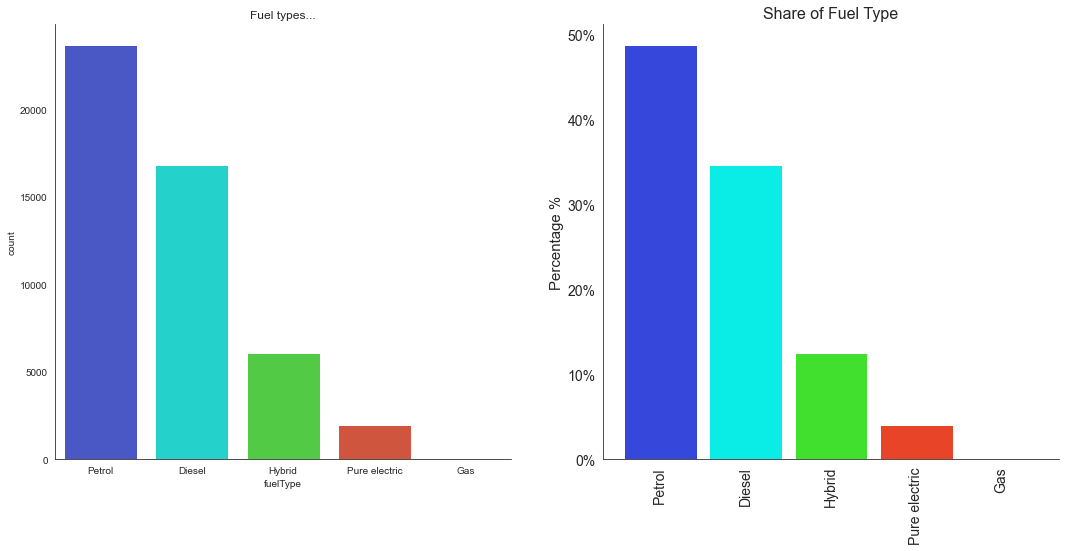

In [42]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
ax1 = sns.countplot(x = 'fuelType', 
                    data = car_df, 
                    order = car_df.fuelType.value_counts().index, # ordering the bars based on their count (most common type is ordered first)
                    palette = ['#3548db','#09ede6','#41e02f','#e84427','#b22ac9'],
                    ax = axes[0])
ax1.set_title('Fuel types...')
#####
ax2 = (car_df.fuelType.value_counts() / len(car_df)).plot(kind='bar', 
                                                          width = 0.85,
                                                          color=['#3548db','#09ede6','#41e02f','#e84427','#b22ac9'],
                                                          ax=axes[1])
ax2.set_title('Share of Fuel Type', fontsize=16)
ax2.set_ylabel('Percentage %', fontsize=15)
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.tick_params(labelsize=14);

<ipython-input-47-e472b0dedb98>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts, autotexts = ax1.pie((car_df.fuelType.value_counts() / len(car_df)),


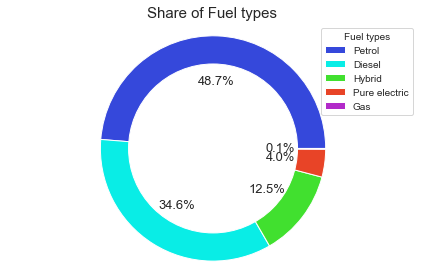

In [47]:
# credits to Kevin Amipara https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie((car_df.fuelType.value_counts() / len(car_df)),
                                    autopct='%.1f%%', 
                                    labels = None,
                                    colors=['#3548db','#09ede6','#41e02f','#e84427','#b22ac9'],
                                    textprops={'fontsize': 13})
ax1.set_title('Share of Fuel types', fontsize=15)
ax1.legend(title='Fuel types', labels=['Petrol','Diesel','Hybrid','Pure electric','Gas'], )
# just drawing a white circle in the center to create the "donut effect"
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

In [68]:
fuel_country_pivot = pd.pivot_table(car_df, index='country_code', columns='fuelType', aggfunc='count')['VRN'] 
fuel_country_pivot

fuelType,Diesel,Gas,Hybrid,Petrol,Pure electric
country_code,,,,,
Antrim,2116,3,815,3474,211
Armagh,2164,25,748,2722,175
Belfast,5891,7,2296,9785,1009
City of Londonderry,750,0,220,859,39
County Londonderry,1310,0,432,1625,99
Down,1641,7,690,2550,154
Fermanagh,1328,4,462,1287,145
Tyrone,1633,8,435,1381,105


In [73]:
fuel_country_pivot_perc = fuel_country_pivot.apply(lambda x: (x/fuel_country_pivot.sum(axis=1)*100), axis=0) # fuel_country_pivot.sum(axis=1) with this function we divide each row with the sum  of the respective row in order to return the share of fuel type per country

In [86]:
from matplotlib.ticker import StrMethodFormatter

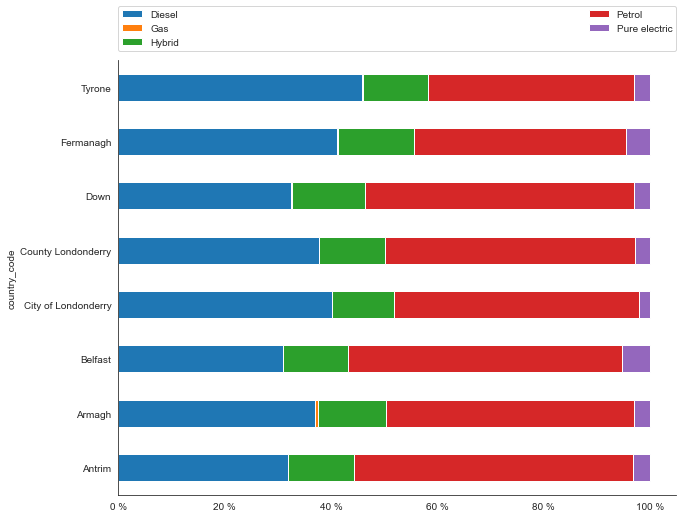

In [88]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)
fuel_country_pivot_perc.plot(kind='barh', stacked=True, ax=ax1)
ax1.xaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f} %"))
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

### Date of registration Number

In [50]:
car_df['date'] = car_df.first_reg_date.apply(lambda x: x[:10])

In [52]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48605 entries, 0 to 48604
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   VRN             48605 non-null  object  
 1   fuelType        48605 non-null  object  
 2   first_reg_date  48605 non-null  object  
 3   country_code    48605 non-null  category
 4   date            48605 non-null  object  
dtypes: category(1), object(4)
memory usage: 1.5+ MB


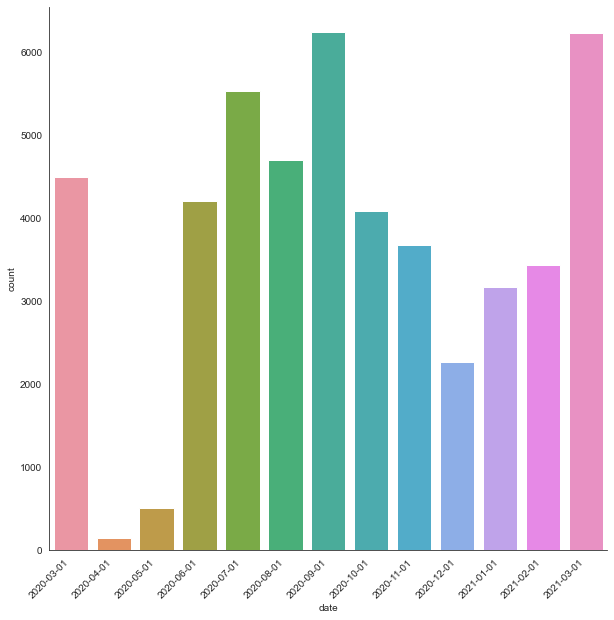

In [54]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='date', data=car_df)
plt.xticks(rotation=45, ha='right');

### Part 1

First, we’d like to know how many vehicles of each fuel type were registered in each region of Northern Ireland per month. Second, we’d like to know how many vehicles of each fuel type have been registered in each month in Northern Ireland. 

In [55]:
car_pivot_1 = pd.pivot_table(car_df, index=['fuelType','date'], columns='country_code', aggfunc='count')['VRN']
car_pivot_1

country_code              Antrim  Armagh  Belfast  City of Londonderry  \
fuelType      date                                                       
Diesel        2020-03-01     274     194      584                   70   
              2020-04-01      25      20       18                    3   
              2020-05-01      26      45       60                   14   
              2020-06-01     178     195      513                   57   
              2020-07-01     222     217      654                   78   
...                          ...     ...      ...                  ...   
Pure electric 2020-11-01      21      12       69                    5   
              2020-12-01      15      13      152                    2   
              2021-01-01      19       9       56                    3   
              2021-02-01      20       8       60                    0   
              2021-03-01      25      31      168                    6   

country_code              County Londonderry  Down  Fermanagh  Tyrone  
fuelType      date                                                     
Diesel        2020-03-01                 136   198        158     162  
              2020-04-01                   8    12          6      15  
              2020-05-01                  18    26         16      20  
              2020-06-01                 113   155        123     167  
              2020-07-01                 157   163        143     167  
...                                      ...   ...        ...     ...  
Pure electric 2020-11-01                   9    14         11       6  
              2020-12-01                  15    16         19      15  
              2021-01-01                   4    20         14      16  
              2021-02-01                   2     9          7       6  
              2021-03-01                  14    26         16      11  

[65 rows x 8 columns]

In [56]:
car_pivot_2 = pd.pivot_table(car_df, index='fuelType', columns='date', aggfunc='count')['VRN']
car_pivot_2

date,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01
fuelType,,,,,,,,,,,,,
Diesel,1776.0,107.0,225.0,1501.0,1801.0,1741.0,2001.0,1359.0,1156.0,591.0,1175.0,1227.0,2173.0
Gas,1.0,NaN,NaN,3.0,NaN,6.0,14.0,4.0,5.0,2.0,7.0,3.0,9.0
Hybrid,411.0,NaN,14.0,404.0,641.0,483.0,753.0,596.0,543.0,279.0,525.0,468.0,981.0
Petrol,2178.0,33.0,216.0,2168.0,2933.0,2317.0,3192.0,1984.0,1819.0,1139.0,1323.0,1623.0,2758.0
Pure electric,119.0,11.0,50.0,120.0,147.0,141.0,268.0,137.0,147.0,247.0,141.0,112.0,297.0


In [93]:
car_pivot_2.columns

Index(['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2021-01-01', '2021-02-01', '2021-03-01'],
      dtype='object', name='date')

In [92]:
car_pivot_2.index

CategoricalIndex(['Diesel', 'Gas', 'Hybrid', 'Petrol', 'Pure electric'], categories=['Diesel', 'Gas', 'Hybrid', 'Petrol', 'Pure electric'], ordered=False, name='fuelType', dtype='category')

<AxesSubplot:xlabel='fuelType'>

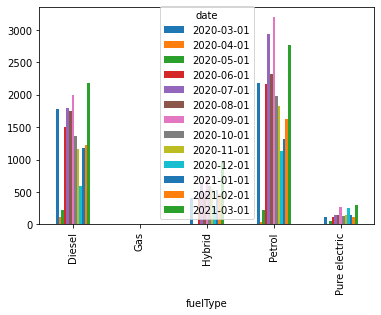

In [102]:
car_pivot_2.plot(kind='bar')